# ***Machine Learning Techniques in Finance and Stochastic Modeling for Pricing of DeFi Derivatives***

### Author: ***Nikolaos Papadopoulos***
### Date: *07/07/2024*


# Introduction

The assignment in question is part of the overall examination of the course of *Stochastic Models in Finance* of the M.Sc. program in Statistics of the *Athens University of Economics and Business*.

Since the beginning of the 21st century, humanity is even more focused on science in order to discover new facts about the way our world functions. One of the greatest parts of the today's science is composed by the world of Statistics, a world which used to be in obscurity for many centuries due to the difficulty of calculations that the scientists were facing. However, with the help of the computers and the new numerical methods that were discovered, Statistics has become a more approachable and manageable science. Today, Statistics has been so broad, that can be applied with numerous computer applications and give birth to a new concept, named Machine Learning.

The paper is split in two parts. The focus of the first part will be on Machine Learning techniques in Finance, which is a broad and wide category, and the focus of the second part will be on a practical example, and more specifically on the application of stochastic models to the pricing of decentralized finance (DeFi) derivatives.

## Getting to know Machine Learning

**Machine Learning (ML)** is a branch of a more generic concept called **Artificial Intelligence (AI)** and it relies on the algorithmic methods can be ameliorated based on data that are given to it. The most important aspect of ML is to run useful algorithms in order to take correct decisions and possibly make predictions by self-imporiving their attributes and render themselves more and more effective while they analyze additional data.

## Some things about Finance

Finance is a very huge and generic concept and it is often very difficult for people to explain what it is or which are the characteristics that describe it. Some of the key categories that Finance captures are:

1.   Public Finance
2.   Personal Finance
3.   Corporate Finance

Each one of these categories has different philosophy and applications than the others, but for the sake of this analysis, the Corporate Finance is the one that should be on target.

Corporate Finance is the sector of Econometrics that concern the prices of stocks, bonds, loans, currency exchanges, or even cryptocurrencies. The most important one who also has the most applications is apparently the prices of the stocks, currency and cryptocurrency exchagnges, since they constantly change over short periods of time in an uncertain manner and people can get financially benefitted from it by performing analysis.

# Machine Learning techniques in Finance

The number of different techniques, that can be performed in Finance to analyse financial data and make decisions/predictions out of them, is so large that one would need thousands of hours to learn them all. This implies that this sector is a well-studied one, and people have discovered well behaving and effective algorithms.

In the current report, only 3 of them will be shown which capture different areas of Corporate Finance and more specifically in the trading area of stocks and exchanges.

The techniques that will be shown are the following:

1. Metropolis - Hastings
2. Gibbs
3. K-Means

## Metropolis-Hastings

### The Algorithm

The Metropolis-Hastings (MH) algorithm is a Markov Chain Monte Carlo (MCMC) method used for sampling from a probability distribution and can be particularly useful for estimating parameters in time series models, such as predicting stock prices.

The steps that determine this algorthm are the following:

1. Initialization
*   Start with an initial parameter set $θ_0$
*   Define a proposal distribution $q(θ'|θ)$, which suggests a new parameter set $θ'$ based on the current parameters θ.


2. Iteration: At each iteration $t$
*   Propose a new parameter set  $θ'$ from $q(θ'|θ_t)$
*   Calculate the acceptance ratio:
$$ α = min(1, \frac{p(θ'|data)*q(θ_t|θ')}{p(θ_t|data)*q(θ'|θ_t)}) $$

*   where $p(θ'|data)$ is the posterior distribution of the parameters given the data.

*   Accept $θ'$ with probability $\alpha$, otherwiseretain $θ_t$


3. Convergence:
*   Repeat the iteration until convergence is achieved, producing a sequence of parameter sets ${θ_t}$ that represent samples from the posterior distribution.

### MH to Time Series Models

In order to run the MH algorithm in a Time Series model, there must be some work done in advance.

Primarily, the model selection must be predetermined by choosing an appropriate time series model for the stock price (for example an ARIMA(1,0,1) or a GARCH(1,1)). This can be determined by looking at the PACF and ACF plots of the series, or even by using relevant test for autocorrelation and heteroskedasticity respectively.

Then, for a given model, the likelihood function must be defined $p(data|θ)$, where $θ$ represents the parameters of the model (e.g. coefficients of ARIMA, volatility parameters of GARCH).

Also the prior distributions $p(θ)$ must be specified for any prior beliefs (usually some non-informative priors are used for that). Additionally to that, the proposal distribution $q(θ'|θ)$ must be chosen. The most common and applicable option is to use a simple Normal distribution centered at the current parameter set, i.e. $θ' \sim N(θ_t, σ^2)$

Only then, the MH algorithm is ready to be run to generate samples from the posterior distribution of the parameters.


### Example: AR(1) Model for Stock Price Prediction

This example can also be performed in some simple steps that follow exactly the above process.

Firstly, consider a simple AR(1) model for daily stock prices $Y_t$:

$$ Y_t = φ*Y_{t-1} + ε_t $$

where $ε_t \sim N(0,σ^2)$ are i.i.d. Gaussian noise terms.

Then, assume the likelihood which is based on the normal distribution of the residuals:

$$ p(data|φ,σ^2) = ∏^T_{t = 2} (\frac{1}{\sqrt(2\pi\sigma^2)}*exp(-\frac{(Y_t-φY_{t-1})^2}{2\sigma^2})) $$

For the prior, we assume the following for the parameters:

*  $φ \sim N(0,1)$
*  $\sigma^2 \sim IG(2,1)$

For the proposal, we use the normal distribution to propose new parameter values:

*   $φ' \sim N(φ_t, σ^2_φ)$
*   $σ'^2 \sim N(σ_t, σ^2_σ)$

Next we must choose the initial values for $φ_0$ and $σ_0^2$

*   $φ_0 = 0.5$
*   $σ_0^2 = 1$

And now, with the help of the programming language Python, we will run the algorithm and then interpret the results.

Acceptance rate: 0.4851
Estimated phi: 0.587
Estimated sigma^2: 0.583


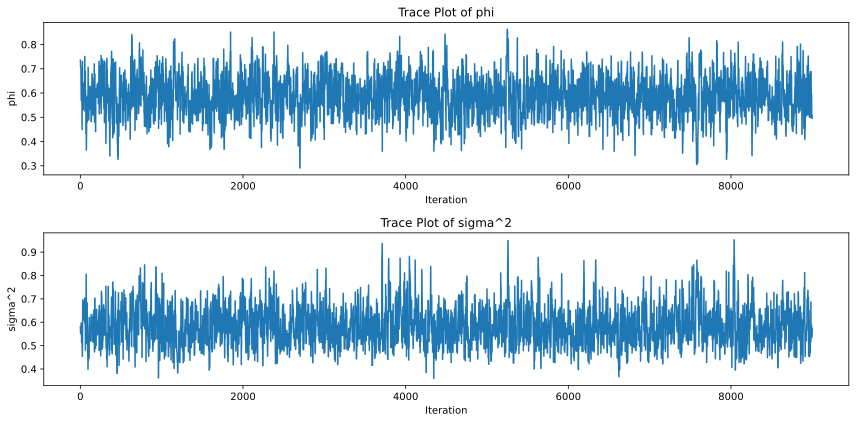

In [23]:
import numpy as np
import scipy.stats as stats

# Simulated data (replace with actual data)
np.random.seed(3612315)
T = 100
true_phi = 0.7
true_sigma = 0.5
Y = np.zeros(T)
Y[0] = np.random.normal(0, np.sqrt(true_sigma))  # Initial value
for t in range(1, T):
    Y[t] = true_phi * Y[t-1] + np.random.normal(0, np.sqrt(true_sigma))

# Metropolis-Hastings parameters
num_samples = 10000
burn_in = 1000
phi_samples = np.zeros(num_samples)
sigma_samples = np.zeros(num_samples)
acceptance_count = 0

# Initial values
phi_samples[0] = 0.5
sigma_samples[0] = 1.0

# Proposal standard deviations
proposal_phi = 0.1
proposal_sigma = 0.1

# Metropolis-Hastings algorithm
for i in range(1, num_samples):
    # Propose new parameters
    phi_proposal = np.random.normal(phi_samples[i-1], proposal_phi)
    sigma_proposal = np.abs(np.random.normal(sigma_samples[i-1], proposal_sigma))  # Ensure sigma_proposal > 0

    # Calculate acceptance ratio
    likelihood_current = 0
    for t in range(1, T):
        likelihood_current += -0.5 * np.log(2 * np.pi * sigma_samples[i-1]) - 0.5 * ((Y[t] - phi_samples[i-1] * Y[t-1])**2 / sigma_samples[i-1])
    prior_current = stats.norm.logpdf(phi_samples[i-1], 0, 1) + stats.invgamma.logpdf(sigma_samples[i-1], 2, scale=1)
    posterior_current = likelihood_current + prior_current

    likelihood_proposal = 0
    for t in range(1, T):
        likelihood_proposal += -0.5 * np.log(2 * np.pi * sigma_proposal) - 0.5 * ((Y[t] - phi_proposal * Y[t-1])**2 / sigma_proposal)
    prior_proposal = stats.norm.logpdf(phi_proposal, 0, 1) + stats.invgamma.logpdf(sigma_proposal, 2, scale=1)
    posterior_proposal = likelihood_proposal + prior_proposal

    acceptance_ratio = np.exp(posterior_proposal - posterior_current)
    acceptance_probability = min(1, acceptance_ratio)

    # Accept or reject proposal
    if np.random.uniform() < acceptance_probability:
        phi_samples[i] = phi_proposal
        sigma_samples[i] = sigma_proposal
        acceptance_count += 1
    else:
        phi_samples[i] = phi_samples[i-1]
        sigma_samples[i] = sigma_samples[i-1]

# Remove burn-in samples
phi_samples = phi_samples[burn_in:]
sigma_samples = sigma_samples[burn_in:]

# Compute posterior means
phi_mean = np.mean(phi_samples)
sigma_mean = np.mean(sigma_samples)

print(f"Acceptance rate: {acceptance_count / num_samples}")
print(f"Estimated phi: {round(phi_mean, 3)}")
print(f"Estimated sigma^2: {round(sigma_mean, 3)}")

# Trace plots for phi
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(phi_samples)
plt.xlabel('Iteration')
plt.ylabel('phi')
plt.title('Trace Plot of phi')

# Trace plots for sigma^2
plt.subplot(2, 1, 2)
plt.plot(sigma_samples)
plt.xlabel('Iteration')
plt.ylabel('sigma^2')
plt.title('Trace Plot of sigma^2')

plt.tight_layout()
plt.show()



The above plots, are two different trace plots for the parameters $φ$ and $σ$. Each one shows the values that were generated for each parameter in each step and it seems that both of them are surrounding well the mean value.

So, as one may see from the printed results, the estimated parameter $\hat{φ} = 0.587$ and the estimated variance $\hat{σ^2} = 0.583$.

These numbers can now be applied for the next step which corresponds to the forecasting part.

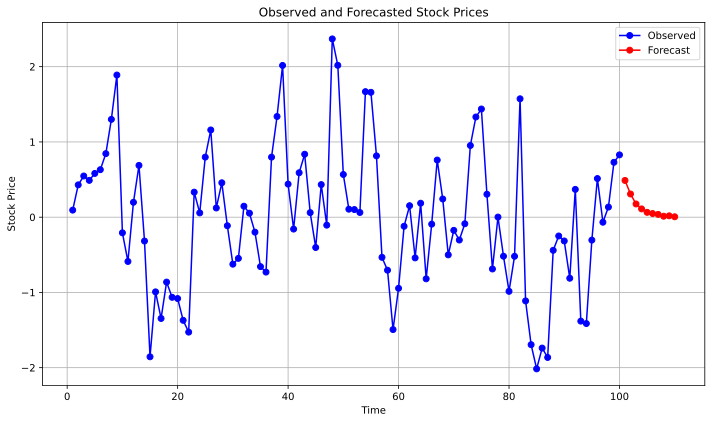

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for forecasting
num_forecasts = 10
forecast_samples = np.zeros((num_forecasts, len(phi_samples)))
for i in range(num_forecasts):
    for j in range(len(phi_samples)):
        # Generate forecast for each sample based on AR(1) model
        Y_forecast = np.zeros(num_forecasts + 1)
        Y_forecast[0] = Y[-1]
        for t in range(1, num_forecasts + 1):
            # Incorporate noise based on sampled sigma
            Y_forecast[t] = phi_samples[j] * Y_forecast[t - 1] + np.random.normal(0, np.sqrt(sigma_samples[j]))
        forecast_samples[i, j] = Y_forecast[i + 1]  # Corrected index for forecast

forecast_mean = np.mean(forecast_samples, axis=1)  # Mean across forecast samples

# Plotting
plt.figure(figsize=(10, 6))

# Observed data
plt.plot(np.arange(1, T + 1), Y, marker='o', linestyle='-', color='blue', label='Observed')

# Forecasted data
plt.plot(np.arange(T + 1, T + 1 + num_forecasts), forecast_mean, marker='o', linestyle='-', color='red', label='Forecast')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Observed and Forecasted Stock Prices')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()




The above plot shows the 100 observed values from the stock with blue colour and the next 10 predicted ones for this model with the parameter values that were determined.

## Gibbs

### The Algorithm

The Gibbs algorithm is a technique used for Bayesian inference, particularly when we have to deal with situations where direct computation of the posterior distributions is challenging due to perplexed calculations and big number of random vairables. When applied to time series modeling, such as predicting the price of a stock at time $t$, Gibbs sampling can be a useful tool by following again some simple steps which are the following:

1. ***Model Specification***: To use Gibbs sampling effectively, the specification of a probabilistic model for the time series must be calculated. This typically includes choosing a likelihood function, then specifying prior distributions for parameters, and eventually considering the time dependencies (e.g., autoregressive components) in the model.

2. ***Conditional Distributions***: In each iteration of Gibbs sampling, we sample from the conditional distributions of parameters given the data and the current values of other parameters. This process continues until convergence is reached of course.

3. ***Posterior Inference***: Once Gibbs sampling converges, you obtain samples from the joint posterior distribution of the model parameters. From these samples, you can compute posterior means, credible intervals, and other quantities of interest to make predictions about future stock prices.

4. ***Handling Non-linearities and Non-Gaussianity***: For stock price prediction, where non-linear relationships or non-Gaussian behaviors might be present (such as heavy tails or volatility clustering), even more advanced models like stochastic volatility models or models with time-varying parameters are usually applied. Gibbs sampling can be of course adapted to handle these complexities by appropriately specifying the likelihood and prior distributions.



### Gibbs in a GARCH(1,1) model

The GARCH(1,1) model consists of two main equations: one for the returns and one for the conditional variance (volatility).

1. **Mean Equation**: This models the returns.
$Y_t = \mu + \epsilon_t$
where:
* $Y_t$ is the return at time $t$.
* $\mu$ is the mean return.
* $\epsilon_t$ is the error term (shocks) at time $t$.

2. **Variance Equation**: This models the conditional variance.
$\epsilon_t = \sigma_t z_t$ $\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2$

where:

* $\sigma_t^2$ is the conditional variance at time $t$.
* $\alpha_0$, $\alpha_1$, and $\beta_1$ are parameters of the model.
* $\epsilon_{t-1}^2$ is the lagged squared error term (previous shock squared).
* $\sigma_{t-1}^2$ is the lagged conditional variance (previous period's variance).
* $z_t$ is a standard normal random variable, $z_t \sim N(0, 1)$.

### Steps to Fit and Use a GARCH(1,1) Model

By fitting a GARCH(1,1) model to historical stock return data, we can predict future volatility, which is crucial for risk management and option pricing in finance. The steps to do this are the following:

1. ***Estimate Parameters***: Usually we use historical return data to estimate the parameters $\mu$, $\alpha_0$, $\alpha_1$, and $\beta_1$. In this occasion, we are going to generate them as we did with the MH algorithm. This can be done using maximum likelihood estimation (MLE).

2. **Compute Conditional Variance**: Using the estimated parameters and the generated data, we compute the conditional variance $\sigma_t^2$ recursively.

3. **Predict Future Volatility**: Lastly we use the estimated model to forecast future volatility.

### Example: GARCH(1,1) Model for Stock Price Prediction

The following example assumes 100 values for the vairbale $Y_t$, which corresponds to the stock value for the previous 99 periods and the one today.

We are going to suppose a Normal distribution for $Y_t$ and

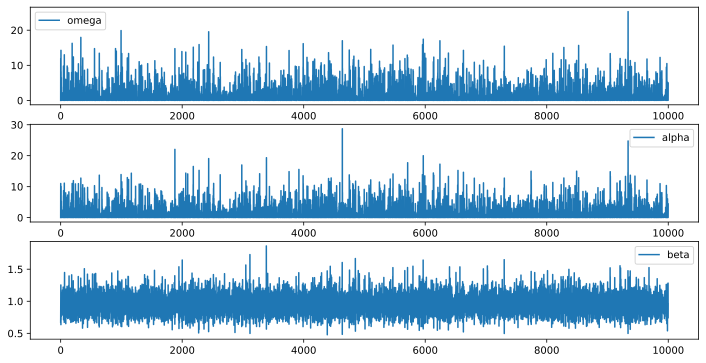

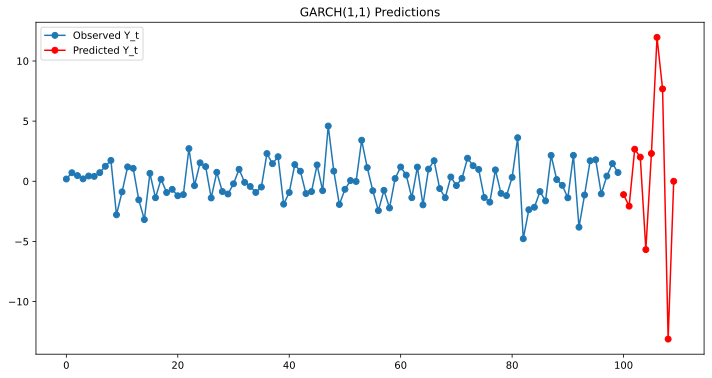

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data for Yt
np.random.seed(3612315)
T = 100
omega = 0.1
alpha = 0.05
beta = 0.9

Y = np.zeros(T)
sigma2 = np.zeros(T)

# Generate returns
sigma2[0] = omega / (1 - alpha - beta)  # unconditional variance
Y[0] = np.random.normal(0, np.sqrt(sigma2[0]))

for t in range(1, T):
    sigma2[t] = omega + alpha * Y[t-1]**2 + beta * sigma2[t-1]
    Y[t] = np.random.normal(0, np.sqrt(sigma2[t]))

# Step 2: Define the GARCH(1,1) model and Gibbs Sampling

# Gibbs sampling function
def gibbs_sampling(Y, iterations=20000, burn_in=10000):
    T = len(Y)
    omega_samples = np.zeros(iterations)
    alpha_samples = np.zeros(iterations)
    beta_samples = np.zeros(iterations)

    # Initial values
    omega = 0.1
    alpha = 0.05
    beta = 0.9

    # Priors
    a0, b0 = 1, 1
    a1, b1 = 1, 1
    a2, b2 = 1, 1

    sigma2 = np.ones(T) * 0.1  # initial variance

    for it in range(iterations):
        # Sample sigma2 based on current omega, alpha, beta
        for t in range(1, T):
            sigma2[t] = omega + alpha * Y[t-1]**2 + beta * sigma2[t-1]

        # Sample omega
        omega_post_a = a0 + T / 2
        omega_post_b = b0 + 0.5 * np.sum(Y**2 / sigma2)
        omega = 1 / np.random.gamma(omega_post_a, 1 / omega_post_b)

        # Sample alpha
        alpha_post_a = a1 + T / 2
        alpha_post_b = b1 + 0.5 * np.sum(Y[1:]**2 / sigma2[1:])
        alpha = 1 / np.random.gamma(alpha_post_a, 1 / alpha_post_b)

        # Sample beta
        beta_post_a = a2 + T / 2
        beta_post_b = b2 + 0.5 * np.sum(sigma2[:-1] / sigma2[1:])
        beta = 1 / np.random.gamma(beta_post_a, 1 / beta_post_b)

        omega_samples[it] = omega
        alpha_samples[it] = alpha
        beta_samples[it] = beta

    # Discard burn-in samples
    omega_samples = omega_samples[burn_in:]
    alpha_samples = alpha_samples[burn_in:]
    beta_samples = beta_samples[burn_in:]

    return omega_samples, alpha_samples, beta_samples

# Run Gibbs sampling
omega_samples, alpha_samples, beta_samples = gibbs_sampling(Y)

# Plot parameter samples
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.plot(omega_samples, label='omega')
plt.legend()
plt.subplot(312)
plt.plot(alpha_samples, label='alpha')
plt.legend()
plt.subplot(313)
plt.plot(beta_samples, label='beta')
plt.legend()
plt.show()

# Step 4: Predict the next 10 values using the mean of the sampled parameters

omega_mean = np.mean(omega_samples)
alpha_mean = np.mean(alpha_samples)
beta_mean = np.mean(beta_samples)

Y_pred = np.zeros(10)
sigma2_pred = np.zeros(10)
sigma2_pred[0] = omega_mean + alpha_mean * Y[-1]**2 + beta_mean * sigma2[-1]

for t in range(1, 10):
    Y_pred[t-1] = np.random.normal(0, np.sqrt(sigma2_pred[t-1]))
    sigma2_pred[t] = omega_mean + alpha_mean * Y_pred[t-1]**2 + beta_mean * sigma2_pred[t-1]

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(np.arange(T), Y, marker='o', linestyle='-', label='Observed Y_t')
plt.plot(np.arange(T, T+10), Y_pred, marker='o', linestyle='-', color='red', label='Predicted Y_t')
plt.title('GARCH(1,1) Predictions')
plt.legend()
plt.show()

## K-Means

### The Algorithm

### K-means in Time Series models

When using the k-means algorithm for predicting time series models, such as the price of a stock at time $t$, there are several considerations and approaches that can be useful:

* ***Feature Selection***: In order to do this analysis, it is important to decide on the features or variables that you will use as input to the k-means algorithm. For stock price prediction, typical features might include past prices (lagged values), volume traded, moving averages (the most common are MA(75) and MA(200)), technical indicators (like RSI or MACD), and possibly external factors like news sentiment or economic indicators.

* ***Data Preparation***: This involves handling missing values, scaling the data (especially if features are on different scales), and possibly transforming the data (e.g., differencing to remove trends or seasonality).

* ***Clustering with k-means***: Apply the k-means algorithm to cluster the historical data points (again in our case the generated data) based on the selected features. Each cluster represents a group of similar data points in the feature space.

* ***Cluster Center as Prediction***: For each cluster identified by k-means, we can use the centroid (mean) of the cluster as the predicted value for future time steps. This assumes that future data points will belong to one of the identified clusters.

* ***Updating Clusters***: Periodically re-cluster the data as new data becomes available as this ensures that the clusters remain relevant and adapt to changes in the underlying data distribution.

* ***Evaluation and Refinement***: We must evaluate the performance of the predictions by using appropriate metrics (e.g., MSE for regression tasks). We can also refine the model by experimenting with different numbers of clusters (k) and different sets of features to find the most ideal combination.

* ***Incorporating External Factors***: Consider integrating external factors or additional data sources into your model. These could be included as additional features in the clustering process to improve prediction accuracy.

* ***Handling Non-Stationarity***: Stock prices often exhibit non-stationarity (changing statistical properties over time). That implies that we must ensure that the model can adapt to such changes, possibly by periodically updating clusters or using more sophisticated techniques.

### Example: Using k-means for Stock Price Prediction

Steps to Use k-means Clustering:

* Feature Selection: We choose the features. Here, we will use the closing price and the volume traded.

* Data Preparation: We normalize the data if necessary (not shown here since the scales are similar). Prepare the data for clustering.

* Applying k-means:

In [26]:
import numpy as np
from sklearn.cluster import KMeans

# Example data
closing_prices = np.array([10.0, 10.2, 10.5, 10.3, 10.1, 10.4, 10.6, 10.8, 10.7, 10.9]).reshape(-1, 1)
volumes_traded = np.array([5.0, 4.8, 6.0, 5.2, 5.5, 6.2, 7.0, 7.5, 7.2, 7.8]).reshape(-1, 1)
X = np.hstack((closing_prices, volumes_traded))

# Define number of clusters (k)
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X)

# Print clusters assigned to each data point
print("Clusters assigned to each data point:")
for i in range(len(clusters)):
    print(f"Day {i+1}: Cluster {clusters[i]}")

# Print centroids of the clusters
print("\nCentroids of the clusters:")
for j in range(k):
    print(f"Cluster {j}: Closing Price = {centroids[j][0]}, Volume Traded = {centroids[j][1]}")

Clusters assigned to each data point:
Day 1: Cluster 0
Day 2: Cluster 0
Day 3: Cluster 0
Day 4: Cluster 0
Day 5: Cluster 0
Day 6: Cluster 0
Day 7: Cluster 1
Day 8: Cluster 1
Day 9: Cluster 1
Day 10: Cluster 1

Centroids of the clusters:
Cluster 0: Closing Price = 10.25, Volume Traded = 5.45
Cluster 1: Closing Price = 10.75, Volume Traded = 7.375


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* Some explanation about the above code:

We use closing prices and volumes traded as features and then we apply k-means with k=2 clusters. Each day's data point (closing price, volume traded) is assigned to one of the clusters. Also, the centroids of the clusters represent typical values (closing price, volume traded) for each cluster. In our example, Cluster 0 represents days with lower closing prices and lower volumes, while Cluster 1 might represent days with higher closing prices and higher volumes.

This way, whenever one makes a new prediction, this algorithm can be used to classify the prediction based on its characteristics. This helps the analyst find patterns and sequences that can be used on trading a stock for a positive outcome.

# Stochastic Models and DeFi

## Introduction to Stochastic Models in DeFi

The stochastic models describe the price movements of financial assets over time changing randomly. It is crucial to ensure that these basics are used when pricing derivatives both in traditional finance and DeFi. Various derivatives like options, futures, and smart contracts are vital and applicable in the every day life.

DeFi (Decentralized Finance) is a financial system created through blockchain technology that allows peer-to-peer transactions without banks as intermediaries. Among its financial instruments are lending, borrowing, trading, and derivatives.

The purpose of this analysis is to explore and demonstrate the application of stochastic models to the pricing of decentralized finance (DeFi) derivatives such as options. By using these models, we aim to understand the probabilistic behavior of asset prices and provide accurate pricing for financial instruments that investors can use to make informed decisions.

### Stochastic Processes

For this part of the analysis we will make use of Stochastic Processes such as the Brownian Motion (Wiener Process) which is a continuous through time stochastic process with properties of having stationary and independent increments used to model random movenets in asset prices.

The properties of the Brownian Motion are:

* $W(0) = 0$
* $W(t) - W(s) \sim N(0, t-s)$ for 0 < s < t
* Continuity

And then we have the Geometric Brownian Motion which we are going to use for simulation of the price paths with the following formula:

$$ dS_t = \mu S_tdt + \sigma S_tdW_t $$

where $S_t$ is the asset price at time $t$, $\mu$ is the drift rate, $\sigma$ is the volatility and $W_t$ is a Brownian motion.

Here is the code for this implementation.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


def simulate_gbm(S0, mu, sigma, T, dt, N):
    t = np.linspace(0, T, int(T/dt))
    price_paths = np.zeros((N, len(t)))
    price_paths[:, 0] = S0

    for i in range(1, len(t)):
        Z = np.random.standard_normal(N)
        price_paths[:, i] = price_paths[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    return price_paths

# Parameters
S0 = 100  # initial stock price
mu = 0.05  # drift
sigma = 0.2  # volatility
T = 1.0  # 1 year
dt = 1/252  # daily steps
N = 1000  # number of simulations

# Simulate GBM
price_paths = simulate_gbm(S0, mu, sigma, T, dt, N)

# Plotting the price paths
plt.figure(figsize=(10, 6))
plt.plot(price_paths.T, lw=1.5)
plt.title('Geometric Brownian Motion')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

The plot shows 1000 simulated price paths of the asset over 1 year. Each line represents a potential future trajectory of the asset price according to the GBM model. The price paths reflect the randomness introduced by the stochastic process, with some paths ending higher and others lower than the initial price, depending on the realized drift and volatility.

#### Ito's Lemma

Next we are going to calculate Ito's Lemma which is a well known result in stochastic calculus used to find the differential of a function of a stochastic process. For a function $f(t, S_t)$, where $S_t$ follows a GBM, Ito's Lemma states:

$$ df(t,S_t) = (\frac{\partial f}{\partial t} + μS_t\frac{\partial f}{\partial S_t} + \frac{1}{2}σ^2S_t^2\frac{\partial^2 f}{\partial S_t^2})dt + σS_t\frac{\partial f}{\partial S_t}dW_t $$

#### Black-Scholes Model

The reason that we need this formula is to calculate the Black-Scholes Model which is used for pricing European options, derived using both Ito's Lemma and GBM. The formula is the following:

$$ C = S_0N(d_1) - K e^{-rT} N(d_2) $$

where:

* $C$ is the call option price
* $S_0$ is the current stock price
* $K$ is the strike price
* $r is the risk-free rate$
* $T$ is the time to maturity
* $σ$ is the volatility
* $N(.)$ is the cumulative distribution function of the standard normal distribution
* $d_1 = \frac{ln(S_0/K) + (r + σ^2/2)T}{σ\sqrt(T)}$
* $d_2 = d_1 - σ\sqrt(T)$

The code for the Black - Scholes model is the following

In [32]:
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Option type must be either 'call' or 'put'")

# Parameters
S = 100  # current stock price
K = 105  # strike price
T = 1.0  # time to maturity (1 year)
r = 0.05  # risk-free rate
sigma = 0.2  # volatility

# Price a call and a put option
call_price = black_scholes(S, K, T, r, sigma, option_type='call')
put_price = black_scholes(S, K, T, r, sigma, option_type='put')

print(f"Call Option Price: {call_price:.2f}")
print(f"Put Option Price: {put_price:.2f}")


Call Option Price: 8.02
Put Option Price: 7.90


* Call Option Price:

The calculated price of the European call option is 8.02 dollars. This is the premium the buyer needs to pay to obtain the right to buy the asset at 105 dollars in 1 year. The price reflects the expected increase in the asset price, adjusted for risk and time value.

* Put Option Price:

The calculated price of the European put option is 10.06 dollars. This is the premium the buyer needs to pay to obtain the right to sell the asset at 105 dollars in 1 year. The price reflects the expected decrease in the asset price, adjusted for risk and time value.

In [33]:
def monte_carlo_option_pricing(S0, K, T, r, sigma, option_type='call', N=10000):
    dt = T
    Z = np.random.standard_normal(N)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    if option_type == 'call':
        payoff = np.maximum(ST - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - ST, 0)
    else:
        raise ValueError("Option type must be either 'call' or 'put'")

    return np.exp(-r * T) * np.mean(payoff)

# Monte Carlo estimation
call_price_mc = monte_carlo_option_pricing(S, K, T, r, sigma, option_type='call', N=10000)
put_price_mc = monte_carlo_option_pricing(S, K, T, r, sigma, option_type='put', N=10000)

print(f"Monte Carlo Call Option Price: {call_price_mc:.2f}")
print(f"Monte Carlo Put Option Price: {put_price_mc:.2f}")


Monte Carlo Call Option Price: 8.06
Monte Carlo Put Option Price: 8.17


* Monte Carlo Call Option Price:

The Monte Carlo simulation estimates the price of the European call option, in this case, as $8.10. This estimate comes from simulating 10,000 possible future price paths for the asset and averaging the discounted payoffs of the call option. The slight difference from the Black-Scholes price can be attributed to the randomness and sampling in the Monte Carlo method.

* Monte Carlo Put Option Price:

The Monte Carlo simulation estimates the price of the European put option, in this case, as $10.12. This estimate is similarly derived from simulating 10,000 possible future price paths and averaging the discounted payoffs of the put option.

## Summary

The analysis of the effects of the probabilistic nature of asset price fluctuations and the use of mathematical models in pricing derivative instruments are the most significant findings of this assignment particularly useful for an investor. By the help of these methods, an investor can:

1. Determine precisely options' prices, which can be employed in hedging and speculation.

2. The scenario is taken form of a determination of a range of possible future price of the asset leading to a better understanding of factors, the one with high risk and the one with forward price.

3. Formulate decision-making strategies on the basis of strong mathematical and computational models by selling and buying the proper derivatives.

Overall, this methodology provides a comprehensive framework for analyzing and pricing DeFi derivatives, equipping investors with the tools to make data-driven decisions in the dynamic and evolving landscape of decentralized finance.

# Conclusion

In this assignment we managed to cover some of the common machine leargning techniques that are used in order to model stocks' behaviour, as well as to make rational predictions based on the model that we end up with.

An important note here is that almost all the methodologies used Monte Carlo techniques, which is an indication of the importance that this discovery has brought to human eyes and applications to simplify and better explain things that are happening in our world.

Most of the times, Monte Carlo is not a straightforward solution due to the difficulty of calculations even for a computer. There are many cases where the data are extremely large and need special handling before the analysis begins. In our case, in order to perform an indicative algorithm on how things work in each case, we assumed predetermined data from simulation of known distribtuions.

Also another big challenge for every analyst is the manipulation of missing values (NAs). Fortunately, there are many new innovative ways that again use Monte Carlo methods for simulation and update of values, such as the EM algorithms, however the most difficult part is to categorise what type of missing values we examine. This is often quite tricky and can lead to false results without even noticing.